In [2]:
class Huffman:
    def encode(self, text: str) -> tuple[str, dict[str, str]]:
        dct, elems, res = {}, {}, []
        for i in set(text):
            dct[i] = text.count(i)/len(text)
        dct = {i:dct[i] for i in sorted(dct)}
        lst = sorted(dct, key = lambda x : dct[x], reverse = True)
        itms = lst[:]
        for el in itms:
            elems[el] = ''
        while len(lst)>1:
            lst = sorted(lst, key = lambda x : dct[x], reverse = True)
            dct[lst[-1]+lst[-2]] = dct[lst[-1]] + dct[lst[-2]]
            for lett in lst[-1]:
                elems[lett] = '1' + elems[lett]
            for lett in lst[-2]:
                elems[lett] = '0' + elems[lett] 
            lst.append(lst[-1]+lst[-2])
           # res = [{lst[-1]:dct[lst[-1]],lst[-2]:dct[lst[-2]]}, res]
            lst.pop(-2)
            lst.pop(-2)
        new = ''
        for i in text:
            new += elems[i]
        return new, elems

    def decode(self, code: str, coding_dict: dict[str, str]):
        decoded = ''
        rest = ''
        for num in code:
            #print(num)
            num = rest + num
            if num in coding_dict.values():
                for key, val in coding_dict.items():
                    if val == num:
                        decoded += key
                        rest = ''
            else:
                rest = num
        return decoded

In [3]:
#тестування
import random
import string
a = Huffman()
characters = string.ascii_letters + string.digits + string.punctuation + ' '
for t in range(100,500) :
    text = ''.join(random.choice(characters) for _ in range(t))
    m = a.encode(text)
    assert text == a.decode(m[0], m[1])


In [3]:
# В алгоритмі Гафмана створюємо словник: кожному символу надаємо його ймовірність. 
# Тоді сортуємо все і починаємо з найменшого елемента
# Йдемо по дереву знизу до гори
# Якщо символ зліва - 0, справа - 1.
# Так утворюємо код для кожного символу
# Аналогічно, коли розкодовуємо код, дивимось чи значення є в словнику
#  Якщо так, розкодовуємо
# Якщр ні, додаємо наступне значення і перевіряємо

0.000995635986328125 0.0
0.0010237693786621094 0.0
0.0 0.007729053497314453
0.0010344982147216797 0.015401363372802734
0.0009965896606445312 0.05003094673156738
0.004355669021606445 0.07773447036743164
0.0039997100830078125 0.15658855438232422
0.005700349807739258 0.43475914001464844


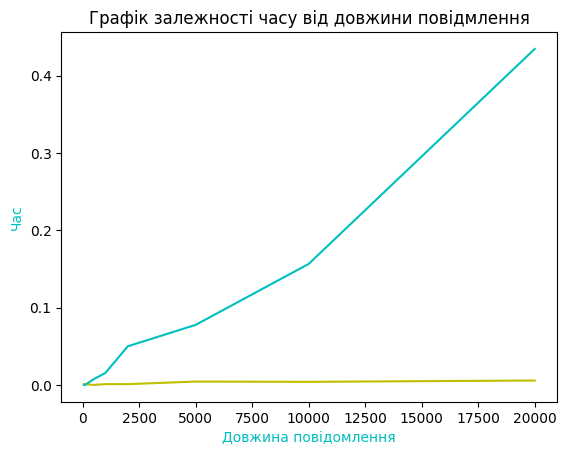

In [4]:
#графік часу
a = Huffman()

import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import random
import string

characters = string.ascii_letters + string.digits + string.punctuation + ' '
losses, losses2, result1, result2 = [], [], [], []
nums = [50, 100,500, 1000, 2000, 5000, 10000, 20000]
for t in nums:
        if isinstance(t, str):
                sentence = str([i for i in open(t, 'r', encoding='utf-8')])
        sentence = ''.join(random.choice(characters) for _ in range(t))
        start = time.time()
        m = a.encode(sentence)
        end = time.time()
        time_taken = (end - start)

        start2 = time.time()
        v = a.decode(m[0], m[1])
        end2 = time.time()
        time_taken2 = (end2 - start2)
        
        print(time_taken, time_taken2)
        assert v==sentence # тестування алгоритму

        losses.append(time_taken)
        losses2.append(time_taken2)

        result1.append(time_taken/len(sentence))
        result2.append(time_taken2/len(sentence))

Y = np.array([i for i in losses])
X = np.array([i for i in nums])
P = np.array([i for i in losses2])
plt.title("Графік залежності часу від довжини повідмлення")                                                                                                                                                                                        
plt.xlabel('Довжина повідомлення', c = 'c')
plt.ylabel('Час', c = 'c')
plt.plot(X, Y, c = 'y') # жовтий - encode
plt.plot(X, P, c= 'c') # синій - decode
plt.show()



#plt.title("Графік залежності часу від довжини повідмлення2")                                                                                                                                                                                        
#plt.xlabel('Довжина повідомлення', c = 'c')
#plt.ylabel('Час ', c = 'c')
#W = np.array([i for i in result1])
#H = np.array([i for i in result2])
#plt.plot(X, W, c = 'y') # жовтий - encode
#plt.plot(X, H, c= 'c') # синій - decode
#plt.show()

#Чим довше повідомлення, тим більше потрібно часу
#Якщо ж поділити час на кількість ітерацій, на початкових етапах треба трохи більше часу 
#Алгоритм розкодування значно швидший ніж алгоритм кодування


In [5]:
#Графік стиснення
a = Huffman()

import matplotlib.pyplot as plt
import numpy as np

import random
import string

characters = string.ascii_letters + string.digits + string.punctuation + ' '
#94604
nums = [100,1000, 5000, 10000, 20000, 74303, 'book.txt']
length = []
for t in nums:
        if isinstance(t, str):
            sentence = str([i for i in open(t, 'r', encoding='utf-8')])
        else:
            sentence = ''.join(random.choice(characters) for _ in range(t))
        m = a.encode(sentence)
        length.append(100 - (len(m[0])/len(sentence)*100))

X = np.array([i for i in nums])
P = np.array([i for i in length])
plt.title("Графік залежності відсотку стиснення від довжини повідмлення")                                                                                                                                                                                        
plt.xlabel('Довжина повідомлення', c = 'c')
plt.ylabel('Відсотки', c = 'c')
plt.plot(X, P, c= 'c')
plt.show()

#Як бачимо на графіку, чим довший текст, тим менший відсоток стиснення,
# але, алгоритм набагато ефективніший при кодуванні книг ніж при послідовності радномних символів
# аналогічної довжини, оскільки в текстах часто повторюються слова


FileNotFoundError: [Errno 2] No such file or directory: 'book.txt'

In [ ]:
#Як бачимо на графіку, чим довший текст, тим менший відсоток стиснення,
# але, алгоритм набагато ефективніший при кодуванні книг ніж при послідовності радномних символів
# аналогічної довжини, оскільки в текстах часто повторюються слова
